# 3.4 모집답에서 표본 추출 시뮬레이션

3.4.1 라이브러리 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/StatisticsWithPython/data/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/StatisticsWithPython/data


In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%precision 3

%matplotlib inline

3.4.2 표본을 얻는 프로세스

3.4.3 5마리 물고기의 예

In [ ]:
fish_5 = np.array([2, 3, 4, 5, 6])
print(fish_5)

[2 3 4 5 6]


In [ ]:
np.random.choice(fish_5, size=1, replace=False)

array([2])

In [ ]:
np.random.choice(fish_5, size=3, replace=False)

array([6, 4, 5])

In [ ]:
np.random.seed(1)
np.random.choice(fish_5, size=3, replace=False)

array([4, 3, 6])

In [ ]:
np.random.seed(1)
np.mean(np.random.choice(fish_5, size=3, replace=False))

4.333

3.4.4 난수

3.4.5 복원추출과 비복원추출 (replace=False)

3.4.6 더 많은 물고기가 있는 호수에서 표본추출


In [ ]:
fish_100000 = pd.read_csv("3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [ ]:
len(fish_100000)

100000

In [ ]:
sampling_result = np.random.choice(fish_100000, size=10, replace=False)
print(sampling_result)

[4.091 5.465 3.426 4.287 4.244 4.282 4.29  5.087 2.769 5.296]


In [ ]:
np.mean(sampling_result)

4.324

3.4.7 모집단분포

In [ ]:
print(f"mean: {np.mean(fish_100000):.3f}")
print(f"std : {np.std(fish_100000, ddof=0):.3f}")
print(f"var : {np.var(fish_100000, ddof=0):.3f}")

mean: 4.000
std : 0.800
var : 0.640


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


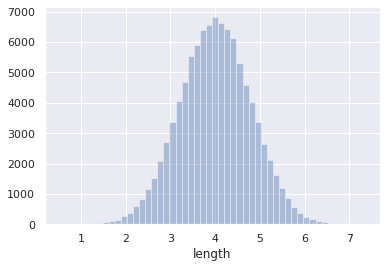

In [ ]:
sns.distplot(fish_100000, kde=False)

3.4.8 모집단분포와 정규분포 간 확률밀도함수 비교

In [ ]:
x = np.arange(start=1, stop=7.1, step=0.1)
print(x)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7. ]


[4.407e-04 6.988e-04 1.091e-03 1.676e-03 2.536e-03 3.778e-03 5.540e-03
 7.998e-03 1.137e-02 1.591e-02 2.191e-02 2.971e-02 3.967e-02 5.215e-02
 6.749e-02 8.598e-02 1.078e-01 1.332e-01 1.619e-01 1.938e-01 2.283e-01
 2.648e-01 3.025e-01 3.401e-01 3.764e-01 4.102e-01 4.401e-01 4.648e-01
 4.833e-01 4.948e-01 4.987e-01 4.948e-01 4.833e-01 4.648e-01 4.401e-01
 4.102e-01 3.764e-01 3.401e-01 3.025e-01 2.648e-01 2.283e-01 1.938e-01
 1.619e-01 1.332e-01 1.078e-01 8.598e-02 6.749e-02 5.215e-02 3.967e-02
 2.971e-02 2.191e-02 1.591e-02 1.137e-02 7.998e-03 5.540e-03 3.778e-03
 2.536e-03 1.676e-03 1.091e-03 6.988e-04 4.407e-04]


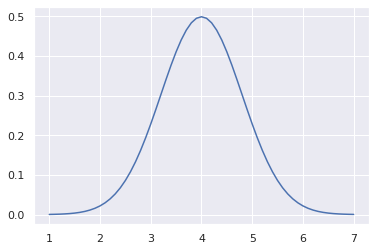

In [ ]:
population = stats.norm.pdf(x=x, loc=4, scale=0.8)
print(population)

plt.plot(x, population)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


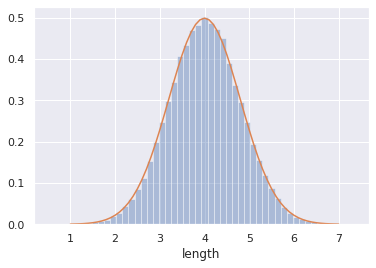

In [ ]:
sns.distplot(fish_100000, kde=False, norm_hist=True)
plt.plot(x, population)

3.4.9 표본을 얻는 절차의 추상화

In [ ]:
sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
print(sampling_norm)
print(np.mean(sampling_norm))

[4.037 3.498 4.322 5.295 5.499 2.905 4.437 4.665 3.786 4.569]
4.301401664573935


3.4.10 유한모집단추정

3.4.11 모집단분포를 정규분포로 가정해도 좋은가

참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)